In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import numpy as np
from matplotlib.pyplot import imshow
from numpy import random
from datetime import datetime, date, time, timezone

# Using datetime.combine()
d = date(2005, 7, 14)
t = time(12, 30)
datetime.combine(d, t)

datetime.datetime(2005, 7, 14, 12, 30)

In [6]:
env_file = "/Users/MBall/PycharmProjects/BATMO/batmo/batdetect2-calls/cumulative_activity__Foliage_30T__formatted.csv"
foliage_df = pd.read_csv(env_file)

env_file0 = '/Users/MBall/PycharmProjects/BATMO/batmo/batdetect2-calls/cumulative_activity__Central_30T__formatted.csv'
centralpond_df = pd.read_csv(env_file0)

env_file4 = '/Users/MBall/PycharmProjects/BATMO/batmo/batdetect2-calls/cumulative_activity__Telephone_30T__formatted.csv'
telephonefield_df = pd.read_csv(env_file4)

env_file2 = "/Users/MBall/PycharmProjects/BATMO/batmo/2023-uwa.csv"
uwa23_df = pd.read_csv(env_file2)

In [7]:
# Assuming 'Date' and 'Time' are separate columns in the DataFrames *_df
foliage_df['Datetime'] = pd.to_datetime(foliage_df['Time'] + ' ' + foliage_df['Date'], format='%H:%M %m-%d-%y')
centralpond_df['Datetime'] = pd.to_datetime(centralpond_df['Time'] + ' ' + centralpond_df['Date'], format='%H:%M %m-%d-%y')
telephonefield_df['Datetime'] = pd.to_datetime(telephonefield_df['Time'] + ' ' + telephonefield_df['Date'], format='%H:%M %m-%d-%y')
uwa23_df['datetime'] = pd.to_datetime(uwa23_df['Date'] + ' ' + uwa23_df['Time'], format='%Y-%m-%d %H:%M:%S')

In [13]:
foliage_df


,Time,Date,Bat Calls,Datetime
0,03:00,05-31-23,1.0,2023-05-31 03:00:00
1,03:30,05-31-23,1.0,2023-05-31 03:30:00
2,04:00,05-31-23,7.0,2023-05-31 04:00:00
3,04:30,05-31-23,148.0,2023-05-31 04:30:00
4,05:00,05-31-23,252.0,2023-05-31 05:00:00
...,...,...,...,...
1171,11:00,07-25-23,0.0,2023-07-25 11:00:00
1172,11:30,07-25-23,0.0,2023-07-25 11:30:00
1173,12:00,07-25-23,0.0,2023-07-25 12:00:00
1174,12:30,07-25-23,0.0,2023-07-25 12:30:00


In [17]:
uwa23_df


,Pseudo-Julian-Date,Date,Time,Temperature,Dewpoint,Relhum,Speed,Gust,Direction,Pressure,Solar,SumRain,Rain
datetime,,,,,,,,,,,,,
2023-06-01 00:00:00,2.460097e+06,2023-06-01,00:00,16.111111,42.7,50.8,5.8,6.3,292,1014.2,297.0,0.00,0.0
2023-06-01 00:01:00,2.460097e+06,2023-06-01,00:01,16.222222,42.7,50.5,8.3,9.1,285,1014.2,305.0,0.00,0.0
2023-06-01 00:02:00,2.460097e+06,2023-06-01,00:02,16.277778,42.9,50.7,6.0,8.9,326,1014.2,297.2,0.00,0.0
2023-06-01 00:03:00,2.460097e+06,2023-06-01,00:03,16.333333,43.0,50.7,4.1,5.6,285,1014.1,297.2,0.00,0.0
2023-06-01 00:04:00,2.460097e+06,2023-06-01,00:04,16.444444,42.9,50.2,8.1,9.4,275,1014.1,296.6,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-02 18:33:00,2.460160e+06,2023-08-02,18:33,22.611111,50.8,46.0,6.9,9.2,181,1013.7,828.4,1.55,0.0
2023-08-02 18:34:00,2.460160e+06,2023-08-02,18:34,22.611111,50.8,46.0,8.2,10.3,190,1013.7,829.4,1.55,0.0
2023-08-02 18:35:00,2.460160e+06,2023-08-02,18:35,22.611111,50.7,45.9,9.7,12.6,213,1013.7,830.5,1.55,0.0


In [9]:
# Convert Fahrenheit to Celsius
uwa23_df['Temperature'] = (uwa23_df['Temperature'] - 32) * 5/9

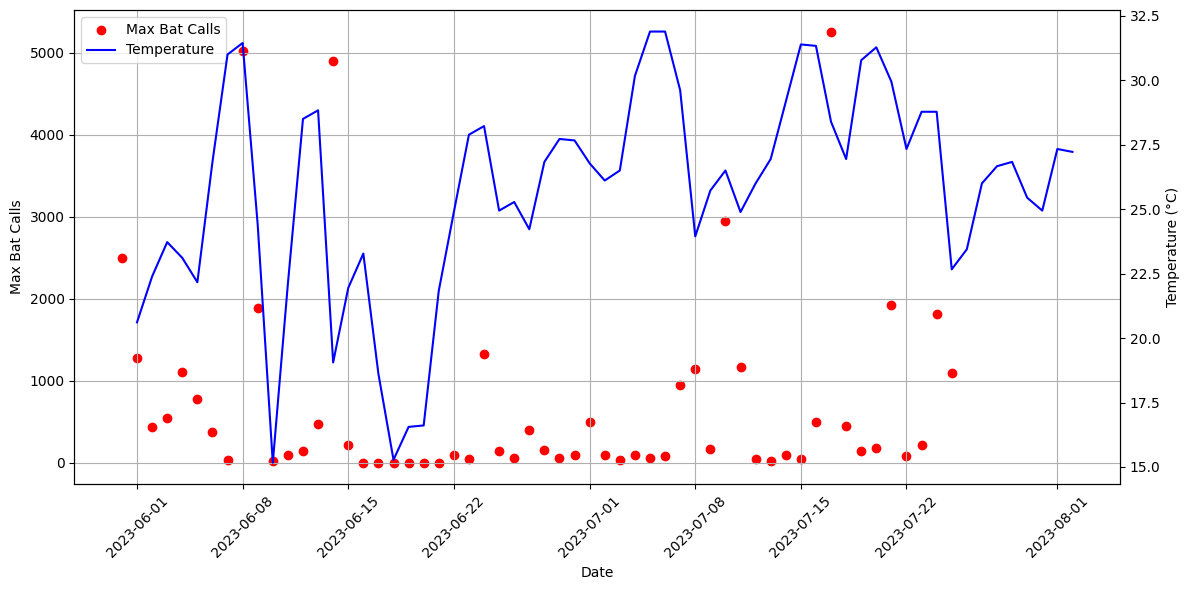

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have DataFrame 'foliage_df' with 'Time', 'Date', 'Bat Calls', and 'Datetime' columns
# And DataFrame 'uwa23_df' with 'Date', 'Time', 'Temperature', and 'datetime' columns

# Convert 'Time' and 'Date' columns to a single datetime column in foliage_df
foliage_df['Datetime'] = pd.to_datetime(foliage_df['Time'] + ' ' + foliage_df['Date'], format='%H:%M %m-%d-%y')

# Convert 'Date' and 'Time' columns to a single datetime column in uwa23_df
uwa23_df['datetime'] = pd.to_datetime(uwa23_df['Date'] + ' ' + uwa23_df['Time'], format='%Y-%m-%d %H:%M:%S')

# Ensure 'Datetime' and 'datetime' columns are in datetime format
foliage_df['Datetime'] = pd.to_datetime(foliage_df['Datetime'])
uwa23_df['datetime'] = pd.to_datetime(uwa23_df['datetime'])

# Set 'Datetime' and 'datetime' as the index for resampling
foliage_df.set_index('Datetime', inplace=True)
uwa23_df.set_index('datetime', inplace=True)

# Resample bat call data to daily max
foliage_df_resampled = foliage_df['Bat Calls'].resample('D').max()

# Resample temperature data to daily max
uwa23_df_resampled = uwa23_df['Temperature'].resample('D').max()

# Create a combined graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bat calls on the primary y-axis
ax1.scatter(foliage_df_resampled.index, foliage_df_resampled, color='red', label='Max Bat Calls')
ax1.set_ylabel('Max Bat Calls')
ax1.grid(True)

# Create a secondary y-axis for temperature
ax2 = ax1.twinx()

# Plot temperature on the secondary y-axis
ax2.plot(uwa23_df_resampled.index, uwa23_df_resampled, color='blue', label='Temperature')
ax2.set_ylabel('Temperature (°C)')

# Set common x-axis label
ax1.set_xlabel('Date')

# Show legend for both primary and secondary y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Rotate x-axis labels for better visibility
ax1.xaxis.set_tick_params(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()






C:\Users\MBall\AppData\Local\Temp\ipykernel_10640\3444646578.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_foliage_df['TimeInSeconds'] = filtered_foliage_df.index.hour * 3600 + filtered_foliage_df.index.minute * 60 + filtered_foliage_df.index.second
C:\Users\MBall\AppData\Local\Temp\ipykernel_10640\3444646578.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_foliage_df['MilitaryTime'] = filtered_foliage_df.index.strftime('%H:%M')
C:\Users\MBall\AppData\Local\Temp\ipykernel_10640\

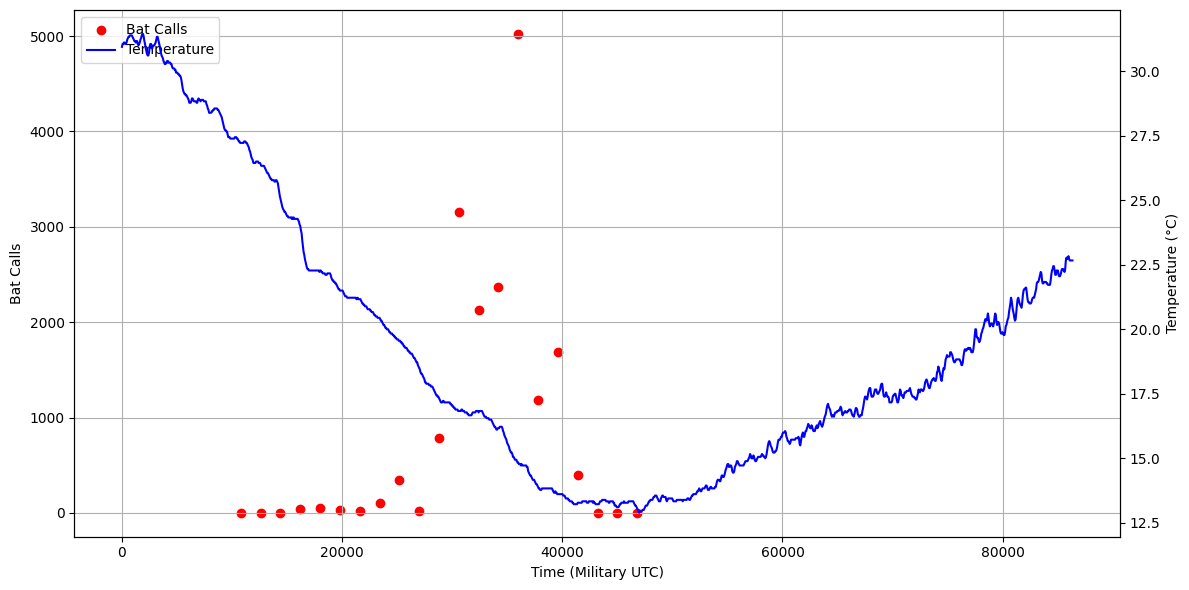

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have DataFrame 'foliage_df' with 'Time', 'Date', 'Bat Calls', and 'Datetime' columns
# And DataFrame 'uwa23_df' with 'Date', 'Time', 'Temperature', and 'datetime' columns

# Convert 'Time' and 'Date' columns to a single datetime column in foliage_df
foliage_df['Datetime'] = pd.to_datetime(foliage_df['Time'] + ' ' + foliage_df['Date'], format='%H:%M %m-%d-%y')

# Convert 'Date' and 'Time' columns to a single datetime column in uwa23_df
uwa23_df['datetime'] = pd.to_datetime(uwa23_df['Date'] + ' ' + uwa23_df['Time'], format='%Y-%m-%d %H:%M:%S')

# Ensure 'Datetime' and 'datetime' columns are in datetime format
foliage_df['Datetime'] = pd.to_datetime(foliage_df['Datetime'])
uwa23_df['datetime'] = pd.to_datetime(uwa23_df['datetime'])

# Set 'Datetime' and 'datetime' as the index for resampling
foliage_df.set_index('Datetime', inplace=True)
uwa23_df.set_index('datetime', inplace=True)

# Filter data for a specific day (e.g., 6/08/2023)
specific_day = '6/08/2023'
filtered_foliage_df = foliage_df[foliage_df.index.date == pd.to_datetime(specific_day).date()]
filtered_uwa23_df = uwa23_df[uwa23_df.index.date == pd.to_datetime(specific_day).date()]

# Convert time to numeric format (seconds since midnight)
filtered_foliage_df['TimeInSeconds'] = filtered_foliage_df.index.hour * 3600 + filtered_foliage_df.index.minute * 60 + filtered_foliage_df.index.second

# Convert time to military format (UTC)
filtered_foliage_df['MilitaryTime'] = filtered_foliage_df.index.strftime('%H:%M')

# Convert datetime to numeric format (seconds since midnight)
filtered_uwa23_df['TimeInSeconds'] = filtered_uwa23_df.index.hour * 3600 + filtered_uwa23_df.index.minute * 60 + filtered_uwa23_df.index.second

# Create a combined graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bat calls on the primary y-axis
ax1.scatter(filtered_foliage_df['TimeInSeconds'], filtered_foliage_df['Bat Calls'], color='red', label='Bat Calls')
ax1.set_ylabel('Bat Calls')
ax1.grid(True)

# Create a secondary y-axis for temperature
ax2 = ax1.twinx()

# Plot temperature on the secondary y-axis
ax2.plot(filtered_uwa23_df['TimeInSeconds'], filtered_uwa23_df['Temperature'], color='blue', label='Temperature')
ax2.set_ylabel('Temperature (°C)')

# Set common x-axis label
ax1.set_xlabel('Time (Military UTC)')

# Show legend for both primary and secondary y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


